In [1]:
from datetime import datetime

import altair as alt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

%matplotlib inline


pd.options.display.max_rows = 500
pd.options.display.max_columns = 100

alt.renderers.enable("mimetype")

import warnings

warnings.filterwarnings("ignore")

Read in data from the website Seattle City GIS

In [2]:
pwd

'/Users/niwako/Workspace/traffic_collisions_viz_team/notebooks'

In [3]:
# scores = pd.read_csv('data/hsb2-2.csv')
rdf = pd.read_csv("../data/collisions_orig.csv")

In [4]:
# url = "https://data-seattlecitygis.opendata.arcgis.com/datasets/5b5c745e0f1f48e7a53acec63a0022ab_0.csv"
# rdf = pd.read_csv(url, parse_dates=["INCDTTM"])

In [5]:
df = rdf.copy()

In [6]:
df.head()

,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,EXCEPTRSNCODE,EXCEPTRSNDESC,SEVERITYCODE,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INJURIES,SERIOUSINJURIES,FATALITIES,INCDATE,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,-122.340472,47.608629,1,18600,18600,1785104,Matched,Intersection,29598.0,PIKE PL AND PIKE ST,NaN,NaN,2,Injury Collision,Pedestrian,2,1,0,1,1,0,0,2004/10/14 00:00:00+00,2004-10-14 18:36:00,At Intersection (intersection related),24.0,MOTOR VEHCILE STRUCK PEDESTRIAN,NaN,0,Overcast,Dry,Dark - Street Lights On,NaN,4288030.0,NaN,3,Vehicle backing hits pedestrian,0,0,N
1,-122.251788,47.508176,2,328272,329772,EA07021,Unmatched,Block,NaN,S PRENTICE ST BETWEEN 65TH AVE S AND 66TH AVE S,NEI,"Not Enough Information, or Insufficient Locati...",1,Property Damage Only Collision,NaN,2,0,0,0,0,0,0,2020/01/22 00:00:00+00,2020-01-22 00:00:00,Mid-Block (not related to intersection),12.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, RIGHT SIDE...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,0,0,Y
2,-122.328526,47.703180,3,328374,329874,EA09347,Matched,Intersection,37555.0,1ST AVE NE AND NE 103RD ST,,NaN,1,Property Damage Only Collision,Angles,4,0,0,2,0,0,0,2020/01/05 00:00:00+00,2020-01-05 13:28:00,At Intersection (intersection related),11.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Raining,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
3,-122.320383,47.539432,4,328985,330485,3857045,Matched,Intersection,34194.0,ELLIS AVE S AND S MYRTLE ST,,NaN,1,Property Damage Only Collision,Sideswipe,2,0,0,2,0,0,0,2020/02/13 00:00:00+00,2020-02-13 08:12:00,At Intersection (intersection related),11.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Overcast,Dry,Daylight,NaN,NaN,NaN,11,From same direction - both going straight - bo...,0,0,N
4,-122.366178,47.669041,5,328852,330352,EA12640,Unmatched,Block,NaN,8TH AVE NW BETWEEN NW MARKET ST AND NW 56TH ST,,NaN,0,Unknown,NaN,0,0,0,0,0,0,0,2020/02/08 00:00:00+00,2020-02-08 00:00:00,Mid-Block (not related to intersection),11.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,0,0,Y


In [7]:
df.shape

(220436, 40)

In [8]:
df.columns

Index(['X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO', 'STATUS',
       'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE', 'EXCEPTRSNDESC',
       'SEVERITYCODE', 'SEVERITYDESC', 'COLLISIONTYPE', 'PERSONCOUNT',
       'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INJURIES', 'SERIOUSINJURIES',
       'FATALITIES', 'INCDATE', 'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE',
       'SDOT_COLDESC', 'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND',
       'LIGHTCOND', 'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE',
       'ST_COLDESC', 'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

For information about each column, refer to:

https://www.seattle.gov/Documents/Departments/SDOT/GIS/Collisions_OD.pdf

In [9]:
df.dtypes

X                  float64
Y                  float64
OBJECTID             int64
INCKEY               int64
COLDETKEY            int64
REPORTNO            object
STATUS              object
ADDRTYPE            object
INTKEY             float64
LOCATION            object
EXCEPTRSNCODE       object
EXCEPTRSNDESC       object
SEVERITYCODE        object
SEVERITYDESC        object
COLLISIONTYPE       object
PERSONCOUNT          int64
PEDCOUNT             int64
PEDCYLCOUNT          int64
VEHCOUNT             int64
INJURIES             int64
SERIOUSINJURIES      int64
FATALITIES           int64
INCDATE             object
INCDTTM             object
JUNCTIONTYPE        object
SDOT_COLCODE       float64
SDOT_COLDESC        object
INATTENTIONIND      object
UNDERINFL           object
WEATHER             object
ROADCOND            object
LIGHTCOND           object
PEDROWNOTGRNT       object
SDOTCOLNUM         float64
SPEEDING            object
ST_COLCODE          object
ST_COLDESC          object
S

In [10]:
df.columns = map(str.lower, df.columns)
df.head(3)

,x,y,objectid,inckey,coldetkey,reportno,status,addrtype,intkey,location,exceptrsncode,exceptrsndesc,severitycode,severitydesc,collisiontype,personcount,pedcount,pedcylcount,vehcount,injuries,seriousinjuries,fatalities,incdate,incdttm,junctiontype,sdot_colcode,sdot_coldesc,inattentionind,underinfl,weather,roadcond,lightcond,pedrownotgrnt,sdotcolnum,speeding,st_colcode,st_coldesc,seglanekey,crosswalkkey,hitparkedcar
0,-122.340472,47.608629,1,18600,18600,1785104,Matched,Intersection,29598.0,PIKE PL AND PIKE ST,NaN,NaN,2,Injury Collision,Pedestrian,2,1,0,1,1,0,0,2004/10/14 00:00:00+00,2004-10-14 18:36:00,At Intersection (intersection related),24.0,MOTOR VEHCILE STRUCK PEDESTRIAN,NaN,0,Overcast,Dry,Dark - Street Lights On,NaN,4288030.0,NaN,3,Vehicle backing hits pedestrian,0,0,N
1,-122.251788,47.508176,2,328272,329772,EA07021,Unmatched,Block,NaN,S PRENTICE ST BETWEEN 65TH AVE S AND 66TH AVE S,NEI,"Not Enough Information, or Insufficient Locati...",1,Property Damage Only Collision,NaN,2,0,0,0,0,0,0,2020/01/22 00:00:00+00,2020-01-22 00:00:00,Mid-Block (not related to intersection),12.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, RIGHT SIDE...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,0,0,Y
2,-122.328526,47.703180,3,328374,329874,EA09347,Matched,Intersection,37555.0,1ST AVE NE AND NE 103RD ST,,NaN,1,Property Damage Only Collision,Angles,4,0,0,2,0,0,0,2020/01/05 00:00:00+00,2020-01-05 13:28:00,At Intersection (intersection related),11.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Raining,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N


### Q1. How to decide that a location is dangerous?

The numeric columns that tell us the scope of these accidents.

In [11]:
num_columns = [
    "personcount",
    "pedcount",
    "pedcylcount",
    "vehcount",
    "injuries",
    "seriousinjuries",
    "fatalities",
]

In [12]:
np.round(df[num_columns].describe(), 3)

,personcount,pedcount,pedcylcount,vehcount,injuries,seriousinjuries,fatalities
count,220436.000,220436.000,220436.000,220436.000,220436.000,220436.000,220436.000
mean,2.227,0.038,0.027,1.731,0.374,0.015,0.002
std,1.471,0.202,0.164,0.829,0.732,0.158,0.044
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,2.000,0.000,0.000,2.000,0.000,0.000,0.000
50%,2.000,0.000,0.000,2.000,0.000,0.000,0.000
75%,3.000,0.000,0.000,2.000,1.000,0.000,0.000
max,93.000,6.000,2.000,15.000,78.000,41.000,5.000


### Q2. Which locations have had the highest total number of accidents?

In [13]:
locdf = df["location"].value_counts().to_frame("count")
locdf = locdf.head(7)
locdf

,count
BATTERY ST TUNNEL NB BETWEEN ALASKAN WY VI NB AND AURORA AVE N,298
N NORTHGATE WAY BETWEEN MERIDIAN AVE N AND CORLISS AVE N,295
BATTERY ST TUNNEL SB BETWEEN AURORA AVE N AND ALASKAN WY VI SB,291
AURORA AVE N BETWEEN N 117TH PL AND N 125TH ST,280
6TH AVE AND JAMES ST,272
AURORA AVE N BETWEEN N 130TH ST AND N 135TH ST,269
ALASKAN WY VI NB BETWEEN S ROYAL BROUGHAM WAY ON RP AND SENECA ST OFF RP,256


Above, dangerousness was defined by the **total** number of incidents. Let's try looking into the number of **severe** incidents.

### Q3. Which locations have the highest numbers of severe incidents?

First, let's take a look at the categories of `severitycode`.

In [14]:
df["severitycode"] = df["severitycode"].map(
    {
        "0": "Unknown",
        "1": "Prop_damage_only",
        "2": "Injury",
        "2b": "Serious_injury",
        "3": "Fatality",
    }
)

In [15]:
severity = df["severitycode"].value_counts(dropna=False).to_frame("count")
severity["Percentage"] = severity["count"] / (severity["count"].sum())
severity

,count,Percentage
Prop_damage_only,137026,0.621614
Injury,58472,0.265256
Unknown,21509,0.097575
Serious_injury,3082,0.013981
Fatality,346,0.001570
NaN,1,0.000005


Looks like the majority of the accidents only involve property damage. But about 27% of the accidents involve injuries.

In [16]:
most_sev = df[df["severitycode"].isin(["Fatality", "Serious_injury", "Injury"])]
most_sev = most_sev["location"].value_counts().to_frame("count")
# Select the top 7 locations; 5 seemed to few but 10 seemed too many...
most_sev = most_sev.head(7)
most_sev

,count
AURORA AVE N BETWEEN N 117TH PL AND N 125TH ST,126
6TH AVE AND JAMES ST,112
RAINIER AVE S BETWEEN S BAYVIEW ST AND S MCCLELLAN ST,97
N NORTHGATE WAY BETWEEN MERIDIAN AVE N AND CORLISS AVE N,96
AURORA AVE N BETWEEN N 130TH ST AND N 135TH ST,96
BATTERY ST TUNNEL SB BETWEEN AURORA AVE N AND ALASKAN WY VI SB,93
WEST SEATTLE BR EB BETWEEN ALASKAN WY VI NB ON RP AND DELRIDGE-W SEATTLE BR EB ON RP,82


Let's compare the locations with the highest numbers of **severe** incidents and locations with the highest numbers of **total** incidents.

In [17]:
# These are the locations with the highest numbers of severe incidents

mostsevlocations = list(most_sev.index)
sorted(mostsevlocations, key=str.lower)

['6TH AVE AND JAMES ST',
 'AURORA AVE N BETWEEN N 117TH PL AND N 125TH ST',
 'AURORA AVE N BETWEEN N 130TH ST AND N 135TH ST',
 'BATTERY ST TUNNEL SB BETWEEN AURORA AVE N AND ALASKAN WY VI SB',
 'N NORTHGATE WAY BETWEEN MERIDIAN AVE N AND CORLISS AVE N',
 'RAINIER AVE S BETWEEN S BAYVIEW ST AND S MCCLELLAN ST',
 'WEST SEATTLE BR EB BETWEEN ALASKAN WY VI NB ON RP AND DELRIDGE-W SEATTLE BR EB ON RP']

In [18]:
# These are the locations with highest numbers of all incidents (extracted earlier)

manyaccident_locations = list(locdf.index)
sorted(manyaccident_locations, key=str.lower)

['6TH AVE AND JAMES ST',
 'ALASKAN WY VI NB BETWEEN S ROYAL BROUGHAM WAY ON RP AND SENECA ST OFF RP',
 'AURORA AVE N BETWEEN N 117TH PL AND N 125TH ST',
 'AURORA AVE N BETWEEN N 130TH ST AND N 135TH ST',
 'BATTERY ST TUNNEL NB BETWEEN ALASKAN WY VI NB AND AURORA AVE N',
 'BATTERY ST TUNNEL SB BETWEEN AURORA AVE N AND ALASKAN WY VI SB',
 'N NORTHGATE WAY BETWEEN MERIDIAN AVE N AND CORLISS AVE N']

- 5 locations appear on both lists
- 2 locations only appear on the list of locations with most severe incidents
- 2 other locations only appear on the list of locations with highest number of incidents
- Looks like there is some overlap between the 2 lists
- Either the number of all accidents or number of severe accidents could be an indicator of dangerousness
- Caution: Locations may not be entered in a standardized manner. Using coordinates may be a better way to identify dangerous locations.

### Q4. How do different accident codes correspond to each other?

In [19]:
code_columns = [
    "COLLISIONTYPE",
    "ST_COLDESC",
    "ST_COLCODE",
    "SDOT_COLDESC",
    "SDOT_COLCODE",
]

In [20]:
code_columns = [x.lower() for x in code_columns]
code_columns

['collisiontype', 'st_coldesc', 'st_colcode', 'sdot_coldesc', 'sdot_colcode']

In [21]:
df["collisiontype"].value_counts()

Parked Car    48364
Angles        35366
Rear Ended    34545
Other         24450
Sideswipe     18812
Left Turn     14047
Pedestrian     7637
Cycles         5893
Right Turn     2998
Head On        2172
Name: collisiontype, dtype: int64

Looks like st_'colcode' and 'sdot_colcode' are numbers for 'st_coldesc' and 'sdot_coldesc', so focus on  'st_coldesc' and 'sdot_coldesc' for now since they give more descriptive information of the accident.

In [22]:
df["st_coldesc"].nunique()

62

In [23]:
df["st_coldesc"].value_counts()

One parked--one moving                                                                   44755
Entering at angle                                                                        35366
From same direction - both going straight - one stopped - rear-end                       26100
Fixed object                                                                             14061
From same direction - both going straight - both moving - sideswipe                      12915
From opposite direction - one left turn - one straight                                   10631
From same direction - both going straight - both moving - rear-end                        7747
Vehicle - Pedalcyclist                                                                    5082
From same direction - all others                                                          4605
Vehicle going straight hits pedestrian                                                    3554
From same direction - one left turn - one straight

In [24]:
df["sdot_coldesc"].nunique()

40

In [25]:
df["sdot_coldesc"].value_counts()

MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END AT ANGLE                  91588
MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END                            58990
NOT ENOUGH INFORMATION / NOT APPLICABLE                                 19103
MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE SIDESWIPE                 10903
MOTOR VEHICLE RAN OFF ROAD - HIT FIXED OBJECT                            9530
MOTOR VEHCILE STRUCK PEDESTRIAN                                          7673
MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE AT ANGLE                   6862
MOTOR VEHICLE STRUCK OBJECT IN ROAD                                      5054
MOTOR VEHICLE STRUCK PEDALCYCLIST, FRONT END AT ANGLE                    3412
MOTOR VEHICLE STRUCK MOTOR VEHICLE, RIGHT SIDE SIDESWIPE                 1803
MOTOR VEHICLE STRUCK MOTOR VEHICLE, RIGHT SIDE AT ANGLE                  1772
PEDALCYCLIST STRUCK MOTOR VEHICLE FRONT END AT ANGLE                     1468
MOTOR VEHICLE OVERTURNED IN ROAD                                

In [26]:
pd.set_option("display.max_rows", 600)

How does st_coldesc relate to collisiontype?

In [27]:
(df.groupby([df.st_coldesc, df.collisiontype]).size().to_frame("count")).unstack()

count                  \
collisiontype                                        Angles  Cycles Head On   
st_coldesc                                                                    
All Other Multi Vehicle                                 NaN     NaN     NaN   
All other non-collision                                 NaN     NaN     NaN   
Breakage of any part of the vehicle resulting i...      NaN     NaN     NaN   
Domestic animal other (cat, dog, etc)                   NaN     NaN     NaN   
Entering at angle                                   35366.0     NaN     NaN   
Fire started in vehicle                                 NaN     NaN     NaN   
Fixed object                                            NaN     NaN     NaN   
From opposite direction - all others                    NaN     NaN  1358.0   
From opposite direction - both going straight -...      NaN     NaN     NaN   
From opposite direction - both going straight -...      NaN     NaN     NaN   
From opposite direction - both moving - head-on         NaN     NaN   677.0   
From opposite direction - one left turn - one r...      NaN     NaN     NaN   
From opposite direction - one left turn - one s...      NaN     NaN     NaN   
From opposite direction - one stopped - head-on         NaN     NaN   137.0   
From same direction - all others                        NaN     NaN     NaN   
From same direction - both going straight - bot...      NaN     NaN     NaN   
From same direction - both going straight - bot...      NaN     NaN     NaN   
From same direction - both going straight - one...      NaN     NaN     NaN   
From same direction - both going straight - one...      NaN     NaN     NaN   
From same direction - one left turn - one straight      NaN     NaN     NaN   
From same direction - one right turn - one stra...      NaN     NaN     NaN   
Non-domestic animal (deer, bear, elk, etc)              NaN     NaN     NaN   
Not stated                                              NaN     NaN     NaN   
One car entering driveway access                        NaN     NaN     NaN   
One car entering parked position                        NaN     NaN     NaN   
One car leaving driveway access                         NaN     NaN     NaN   
One car leaving parked position                         NaN     NaN     NaN   
One parked--one moving                                  NaN     NaN     NaN   
Other object                                            NaN     NaN     NaN   
Pedalcyclist All Other Involvements ONE UNIT - ...      NaN    27.0     NaN   
Pedalcyclist Strikes Moving Vehicle                     NaN   294.0     NaN   
Pedalcyclist Strikes Pedalcyclist or Pedestrian         NaN    24.0     NaN   
Person fell, jumped or was pushed from vehicle          NaN     NaN     NaN   
Railway Vehicle Strikes Pedalcyclist                    NaN     NaN     NaN   
Railway Vehicle Strikes Pedestrian                      NaN     NaN     NaN   
Railway Vehicle Strikes Vehicle                         NaN     NaN     NaN   
Same direction -- both turning left -- both mov...      NaN     NaN     NaN   
Same direction -- both turning left -- both mov...      NaN     NaN     NaN   
Same direction -- both turning left -- one stop...      NaN     NaN     NaN   
Same direction -- both turning left -- one stop...      NaN     NaN     NaN   
Same direction -- both turning right -- both mo...      NaN     NaN     NaN   
Same direction -- both turning right -- both mo...      NaN     NaN     NaN   
Same direction -- both turning right -- one sto...      NaN     NaN     NaN   
Same direction -- both turning right -- one sto...      NaN     NaN     NaN   
Strikes or Was Struck by Object from the Load o...      NaN     NaN     NaN   
Strikes or Was Struck by a Part of Another Vehi...      NaN     NaN     NaN   
Vehicle - Pedalcyclist                                  NaN  5082.0     NaN   
Vehicle Hits City Road or Construction Machinery        NaN     NaN     NaN   
Vehicle Hits Other Road o

- Each 'st_coldesc' category maps on to a 'collisiontype' category
- Each 'collisiontype' category includes multiple 'st_coldesc' categories
- This means that if we use 'collisiontype' all 'st_coldesc' categories will be presented in fewer categories
- How does 'sdot_coldesc' map on to 'collisiontype'?

In [28]:
(df.groupby([df.sdot_coldesc, df.collisiontype]).size().to_frame("count")).unstack()

count                  \
collisiontype                                        Angles  Cycles Head On   
sdot_coldesc                                                                  
DRIVERLESS VEHICLE RAN OFF ROAD - HIT FIXED OBJECT      NaN     NaN     NaN   
DRIVERLESS VEHICLE RAN OFF ROAD - NO COLLISION          NaN     NaN     NaN   
DRIVERLESS VEHICLE STRUCK MOTOR VEHICLE FRONT E...      5.0     1.0     7.0   
DRIVERLESS VEHICLE STRUCK MOTOR VEHICLE LEFT SI...      NaN     NaN     NaN   
DRIVERLESS VEHICLE STRUCK MOTOR VEHICLE LEFT SI...      NaN     1.0     NaN   
DRIVERLESS VEHICLE STRUCK MOTOR VEHICLE REAR END        1.0     NaN     NaN   
DRIVERLESS VEHICLE STRUCK MOTOR VEHICLE RIGHT S...      NaN     NaN     NaN   
DRIVERLESS VEHICLE STRUCK MOTOR VEHICLE RIGHT S...      NaN     NaN     NaN   
DRIVERLESS VEHICLE STRUCK OBJECT IN ROADWAY             NaN     NaN     NaN   
DRIVERLESS VEHICLE STRUCK PEDESTRIAN                    NaN     NaN     NaN   
MOTOR VEHCILE STRUCK PEDESTRIAN                        14.0    43.0     1.0   
MOTOR VEHICLE OVERTURNED IN ROAD                        8.0     7.0     1.0   
MOTOR VEHICLE RAN OFF ROAD - HIT FIXED OBJECT          16.0     4.0     1.0   
MOTOR VEHICLE RAN OFF ROAD - NO COLLISION               NaN     NaN     1.0   
MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END A...  32748.0   141.0  1888.0   
MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE A...     12.0     1.0     7.0   
MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE S...    158.0    12.0    38.0   
MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END         2014.0    54.0   153.0   
MOTOR VEHICLE STRUCK MOTOR VEHICLE, RIGHT SIDE ...      1.0     2.0     1.0   
MOTOR VEHICLE STRUCK MOTOR VEHICLE, RIGHT SIDE ...     44.0     2.0    11.0   
MOTOR VEHICLE STRUCK OBJECT IN ROAD                    35.0    10.0    24.0   
MOTOR VEHICLE STRUCK PEDALCYCLIST, FRONT END AT...     25.0  3157.0     3.0   
MOTOR VEHICLE STRUCK PEDALCYCLIST, LEFT SIDE SI...      NaN   126.0     NaN   
MOTOR VEHICLE STRUCK PEDALCYCLIST, REAR END             NaN   193.0     1.0   
MOTOR VEHICLE STRUCK PEDALCYCLIST, RIGHT SIDE S...      NaN    18.0     NaN   
MOTOR VEHICLE STRUCK TRAIN                              4.0     NaN     NaN   
NOT ENOUGH INFORMATION / NOT APPLICABLE               273.0   132.0    35.0   
PEDALCYCLIST OVERTURNED IN ROAD                         NaN    73.0     NaN   
PEDALCYCLIST RAN OFF ROAD - HIT FIXED OBJECT            NaN     3.0     NaN   
PEDALCYCLIST STRUCK MOTOR VEHICLE FRONT END AT ...      8.0  1403.0     NaN   
PEDALCYCLIST STRUCK MOTOR VEHICLE LEFT SIDE AT ...      NaN     9.0     NaN   
PEDALCYCLIST STRUCK MOTOR VEHICLE LEFT SIDE SID...      NaN   187.0     NaN   
PEDALCYCLIST STRUCK MOTOR VEHICLE REAR END              NaN   135.0     NaN   
PEDALCYCLIST STRUCK MOTOR VEHICLE RIGHT SIDE AT...      NaN     2.0     NaN   
PEDALCYCLIST STRUCK MOTOR VEHICLE RIGHT SIDE SI...      NaN    53.0     NaN   
PEDALCYCLIST STRUCK OBJECT IN ROAD                      NaN    24.0     NaN   
PEDALCYCLIST STRUCK PEDALCYCLIST FRONT END AT A...      NaN     6.0     NaN   
PEDALCYCLIST STRUCK PEDALCYCLIST REAR END               NaN     7.0     NaN   
PEDALCYCLIST STRUCK PEDESTRIAN                          NaN    87.0     NaN   

                                                                      \
collisiontype                                      Left Turn   Other   
sdot_coldesc                                                           
DRIVERLESS VEHICLE RAN OFF ROAD - HIT FIXED OBJECT       NaN   101.0   
DRIVERLESS VEHICLE RAN OFF ROAD - NO COLLISION           NaN     2.0   
DRIVERLESS VEHICLE STRUCK MOTOR VEHICLE FRONT E...       NaN    20.0   
DRIVERLESS VEHICLE STRUCK MOTOR VEHICLE LEFT SI...       NaN     3.0   
DRIVERLESS VEHICLE STRUCK MOTOR VEHICLE LEFT SI...       NaN     NaN   
DRIVERLESS VEHICLE STRUCK MOTOR VEHICLE REAR END         NaN     9.0   
DRIVERLESS VEHICLE STRUCK MOTOR VEHICLE RIGHT S...       NaN     NaN   
DRIVERLESS VEHI

- Each 'sdot_coldesc' category maps on to multiple 'collisiontype' categories
    - Some are hard to understand
    - e.g., MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END AT ANGLE
    - e.g., MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE AT ANGLE
- Each collisiontype category includes multiple sdot_coldesc categories
- How does 'st_coldesc' relate to 'sdot_coldesc'?

In [29]:
(df.groupby([df.st_coldesc, df.sdot_coldesc]).size().to_frame("count")).unstack()

count  \
sdot_coldesc                                       MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END AT ANGLE   
st_coldesc                                                                                                  
All Other Multi Vehicle                                                                           5.0       
All other non-collision                                                                          13.0       
Breakage of any part of the vehicle resulting i...                                                6.0       
Domestic animal other (cat, dog, etc)                                                             NaN       
Entering at angle                                                                             32748.0       
Fire started in vehicle                                                                           NaN       
Fixed object                                                                                    214.0       
From opposite direction - all others                                                           1120.0       
From opposite direction - both going straight -...                                              135.0       
From opposite direction - both going straight -...                                              741.0       
From opposite direction - both moving - head-on                                                 647.0       
From opposite direction - one left turn - one r...                                              244.0       
From opposite direction - one left turn - one s...                                            10378.0       
From opposite direction - one stopped - head-on                                                 121.0       
From same direction - all others                                                               3617.0       
From same direction - both going straight - bot...                                              248.0       
From same direction - both going straight - bot...                                             8898.0       
From same direction - both going straight - one...                                              201.0       
From same direction - both going straight - one...                                              813.0       
From same direction - one left turn - one straight                                             2492.0       
From same direction - one right turn - one stra...                                             2006.0       
Non-domestic animal (deer, bear, elk, etc)                                                        NaN       
Not stated                                                                                       18.0       
One car entering driveway access                                                               1260.0       
One car entering parked position                                                                509.0       
One car leaving driveway access                                                                2012.0       
One car leaving parked position                                                                2476.0       
One parked--one moving                                                                        11834.0       
Other object                                                                                     41.0       
Pedalcyclist All Other Involvements ONE UNIT - ...                                                2.0       
Pedalcyclist Strikes Moving Vehicle                                                               8.0       
Pedalcyclist Strikes Pedalcyclist or Pedestrian                                                   NaN       
Person fell, jumped or was pushed from vehicle                                                    4.0       
Railway Vehicle Strikes Pedalcyclist                                                              NaN       
Railway Vehicle Strikes Pedestrian                                 

- The relation is a little messy
    - e.g. Fixed object 
- We should probably use 'collisiontype' and/or 'st_coldesc'if we want to do the simplest thing
- If we want to figure out what aspects of the accident 'sdot_coldesc' and 'st_coldesc' each measures, we need to look into the words in each category 

### Q5. Does the description of each accident provide information about factors associated with severe accidents?

The `st_colcode` column provides information about what each vehicle or person was doing when the accident happened. These descriptions may give us some idea about how to prevent accidents. First, let's look at the descriptions for the overall dataset.

In [30]:
# Because there are 62 unique values for this column, select the top 7 for now
commondescriptions = df["st_coldesc"].value_counts()[:7]
commondescriptions = list(commondescriptions.index)
sorted(commondescriptions, key=str.lower)

['Entering at angle',
 'Fixed object',
 'From opposite direction - one left turn - one straight',
 'From same direction - both going straight - both moving - rear-end',
 'From same direction - both going straight - both moving - sideswipe',
 'From same direction - both going straight - one stopped - rear-end',
 'One parked--one moving']

Now let's take a look at the common categories for this column `st_coldesc` in the locations that had the highest number of severe accidents identified earlier.

In [31]:
mostsevlocations = list(most_sev.index)
mostsev_df = df[df["location"].isin(most_sev.index)]
# Again just focus on the top 7 common categories
desciptions = mostsev_df["st_coldesc"].value_counts().head(7)
mostsevdescriptions = list(desciptions.index)
sorted(mostsevdescriptions, key=str.lower)

['Entering at angle',
 'Fixed object',
 'From opposite direction - one left turn - one straight',
 'From same direction - both going straight - both moving - rear-end',
 'From same direction - both going straight - both moving - sideswipe',
 'From same direction - both going straight - one stopped - rear-end',
 'One car leaving driveway access']

- Comparing the two lists, most categories are the same, except for the last category on each list
- A vehicle hitting another parked vehicle was the 7th most common category for all the locations
- One car leaving driveway access was the 7th most common category for the locations with the highest numbers of severe accidents
- Now take a look at the distribution of these categories among the 7 locations

In [32]:
mostsevdescript_df = mostsev_df[mostsev_df.st_coldesc.isin(mostsevdescriptions)]
pd.crosstab(mostsevdescript_df["location"], [mostsevdescript_df["st_coldesc"]])

st_coldesc,Entering at angle,Fixed object,From opposite direction - one left turn - one straight,From same direction - both going straight - both moving - rear-end,From same direction - both going straight - both moving - sideswipe,From same direction - both going straight - one stopped - rear-end,One car leaving driveway access
location,,,,,,,
6TH AVE AND JAMES ST,59,2,139,1,4,8,0
AURORA AVE N BETWEEN N 117TH PL AND N 125TH ST,9,14,34,29,20,69,8
AURORA AVE N BETWEEN N 130TH ST AND N 135TH ST,41,8,11,8,19,82,26
BATTERY ST TUNNEL SB BETWEEN AURORA AVE N AND ALASKAN WY VI SB,0,188,0,18,15,28,0
N NORTHGATE WAY BETWEEN MERIDIAN AVE N AND CORLISS AVE N,43,3,11,13,26,79,42
RAINIER AVE S BETWEEN S BAYVIEW ST AND S MCCLELLAN ST,28,12,15,22,46,51,13
WEST SEATTLE BR EB BETWEEN ALASKAN WY VI NB ON RP AND DELRIDGE-W SEATTLE BR EB ON RP,1,32,0,54,52,58,0


- 'One car leaving driveway access' was more common at N NORTHGATE WAY BETWEEN MERIDIAN AVE N AND CORLISS AVE N than other locations
- 'Fixed object' was most common at BATTERY ST TUNNEL SB BETWEEN AURORA AVE N AND ALASKAN WY VI SB
- At this location, 'Fixed object' was also more common than other descriptions. What was the object that was getting hit by so many vehicles? Was it construction-related?
- 'From opposite direction - one left turn - one straight' was most commonly seen at 6TH AVE AND JAMES ST among the 7 locations

### Q6. How is collisiontype related to severity of accidents?

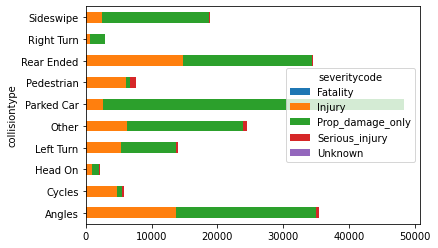

In [33]:
df.pivot_table(index="collisiontype", columns="severitycode", aggfunc="size").plot.barh(
    stacked=True
)
plt.savefig("collisiontype_severity.png", bbox_inches="tight")

- In most collision types, property damage only takes up the largest proportion
- Injury category takes up more proportion in rear ending and angles than parked car
- When pedestrians and cyclists are involved, injury takes up more proportio
- There is a larger proportion of serious injury when pedestrians are involved

## Attempts to reduce the categories of st_coldesc

### Feature Hashing

In [34]:
df["st_coldesc"].fillna("")

0                           Vehicle backing hits pedestrian
1                                                          
2                                         Entering at angle
3         From same direction - both going straight - bo...
4                                                          
                                ...                        
220431                               One parked--one moving
220432                                                     
220433    From same direction - both going straight - on...
220434    From same direction - both going straight - on...
220435    Strikes or Was Struck by a Part of Another Veh...
Name: st_coldesc, Length: 220436, dtype: object

For information about feature hashing: https://towardsdatascience.com/understanding-feature-engineering-part-2-categorical-data-f54324193e63

In [35]:
from sklearn.feature_extraction import FeatureHasher

fh = FeatureHasher(n_features=20, input_type="string")
hashed_features = fh.fit_transform(df["st_coldesc"].fillna(""))

In [36]:
hashed_features

<220436x20 sparse matrix of type '<class 'numpy.float64'>'
	with 2114776 stored elements in Compressed Sparse Row format>

In [37]:
hashed_features = hashed_features.toarray()
pd.concat([df, pd.DataFrame(hashed_features)], axis=1).iloc[1:7]

,x,y,objectid,inckey,coldetkey,reportno,status,addrtype,intkey,location,exceptrsncode,exceptrsndesc,severitycode,severitydesc,collisiontype,personcount,pedcount,pedcylcount,vehcount,injuries,seriousinjuries,fatalities,incdate,incdttm,junctiontype,sdot_colcode,sdot_coldesc,inattentionind,underinfl,weather,roadcond,lightcond,pedrownotgrnt,sdotcolnum,speeding,st_colcode,st_coldesc,seglanekey,crosswalkkey,hitparkedcar,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
1,-122.251788,47.508176,2,328272,329772,EA07021,Unmatched,Block,NaN,S PRENTICE ST BETWEEN 65TH AVE S AND 66TH AVE S,NEI,"Not Enough Information, or Insufficient Locati...",Prop_damage_only,Property Damage Only Collision,NaN,2,0,0,0,0,0,0,2020/01/22 00:00:00+00,2020-01-22 00:00:00,Mid-Block (not related to intersection),12.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, RIGHT SIDE...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,0,0,Y,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-122.328526,47.703180,3,328374,329874,EA09347,Matched,Intersection,37555.0,1ST AVE NE AND NE 103RD ST,,NaN,Prop_damage_only,Property Damage Only Collision,Angles,4,0,0,2,0,0,0,2020/01/05 00:00:00+00,2020-01-05 13:28:00,At Intersection (intersection related),11.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Raining,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N,0.0,-1.0,-2.0,0.0,-3.0,1.0,0.0,1.0,0.0,0.0,2.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-122.320383,47.539432,4,328985,330485,3857045,Matched,Intersection,34194.0,ELLIS AVE S AND S MYRTLE ST,,NaN,Prop_damage_only,Property Damage Only Collision,Sideswipe,2,0,0,2,0,0,0,2020/02/13 00:00:00+00,2020-02-13 08:12:00,At Intersection (intersection related),11.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Overcast,Dry,Daylight,NaN,NaN,NaN,11,From same direction - both going straight - bo...,0,0,N,0.0,-10.0,-4.0,5.0,-3.0,0.0,-1.0,0.0,0.0,-3.0,2.0,0.0,11.0,0.0,0.0,0.0,3.0,-1.0,-1.0,-3.0
4,-122.366178,47.669041,5,328852,330352,EA12640,Unmatched,Block,NaN,8TH AVE NW BETWEEN NW MARKET ST AND NW 56TH ST,,NaN,Unknown,Unknown,NaN,0,0,0,0,0,0,0,2020/02/08 00:00:00+00,2020-02-08 00:00:00,Mid-Block (not related to intersection),11.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,0,0,Y,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,-122.345421,47.611556,6,332183,333683,EA40647,Unmatched,Block,NaN,WESTERN AVE BETWEEN LENORA ST AND BLANCHARD ST,,NaN,Injury,Injury Collision,NaN,2,0,0,0,1,0,0,2020/06/10 00:00:00+00,2020-06-10 00:00:00,Mid-Block (not related to intersection),11.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,0,0,N,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,-122.346793,47.662069,7,328595,330095,EA05985,Matched,Block,NaN,N 46TH ST BETWEEN PHINNEY TURN RD AND GREEN LA...,,NaN,Prop_damage_only,Property Damage Only Collision,Other,2,0,0,2,0,0,0,2020/01/21 00:00:00+00,2020-01-21 08:48:00,Mid-Block (not related to intersection),14.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",NaN,N,Overcast,Wet,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N,0.0,-2.0,0.0,3.0,-1.0,2.0,0.0,0.0,0.0,-1.0,2.0,0.0,7.0,0.0,0.0,0.0,2.0,-1.0,-1.0,0.0


### Group categories into larger categories by words in the descriptions

**List st_coldesc categories**

In [38]:
df.groupby(['st_coldesc'])['objectid'].size().to_frame("count")

,count
st_coldesc,
All Other Multi Vehicle,8
All other non-collision,109
Breakage of any part of the vehicle resulting in injury or in further property damage,34
"Domestic animal other (cat, dog, etc)",33
Entering at angle,35366
Fire started in vehicle,7
Fixed object,14061
From opposite direction - all others,1358
From opposite direction - both going straight - one stopped - sideswipe,236


**Reduce the number of categories for st_coldesc**

In [39]:
def remap(cell):
    if 'Entering at angle' in cell:
        return 'vehicle_vehicle'
    if 'From opposite direction' in cell: 
        return 'vehicle_vehicle'
    if 'From same direction' in cell: 
        return 'vehicle_vehicle'
    if 'One car' in cell:
        return 'vehicle_vehicle'
    if 'One parked' in cell:
        return 'vehicle_vehicle'
    if 'Same direction' in cell:
        return 'vehicle_vehicle'
    if 'Deer' in cell : 
        return 'animal'
    if 'animal' in cell or 'Animal' in cell: 
        return 'animal'
    if 'Machinery' in cell:
        return 'vehicle_machinery'
    if 'Railway' in cell:
        return 'railway_vehicle' # Includes vehicles and pedalcyclists
    if 'Vehicle' in cell and ('pedestrian' in cell or 'Pedestrian' in cell):
        return 'vehicle_pedestrian'
    if 'Vehicle' in cell and 'Pedalcyclist' in cell:
        return 'vehicle_pedalcyclist' # Includes pedalcyclists hit moving vehicles
    if 'Pedalcyclist Strikes Pedalcyclist or Pedestrian' in cell:
        return 'pedalcyclist_nonmotorized'# Includes another pedalcyclist and pedestrian
    if 'Breakage' in cell or 'Person fell' in cell or 'Fire' in cell:
        return 'vehicle_other'
    if 'PEDALCYCLIST ONLY' in cell: # I'm not sure what STR means in this label
        return 'pedalcyclist_nonmotorized'
    if 'Strikes or Was Struck by' in cell or 'All Other Multi Vehicle' in cell:
        return 'vehicle_vehicle'
    return cell

df['re_st_coldesc'] = df['st_coldesc'].fillna('missing').apply(remap)

In [40]:
df.tail(5)

,x,y,objectid,inckey,coldetkey,reportno,status,addrtype,intkey,location,exceptrsncode,exceptrsndesc,severitycode,severitydesc,collisiontype,personcount,pedcount,pedcylcount,vehcount,injuries,seriousinjuries,fatalities,incdate,incdttm,junctiontype,sdot_colcode,sdot_coldesc,inattentionind,underinfl,weather,roadcond,lightcond,pedrownotgrnt,sdotcolnum,speeding,st_colcode,st_coldesc,seglanekey,crosswalkkey,hitparkedcar,re_st_coldesc
220431,-122.316781,47.604778,220432,331612,333112,3847805,Matched,Block,NaN,12TH AVE BETWEEN E ALDER ST AND E TERRACE ST,,NaN,Prop_damage_only,Property Damage Only Collision,Parked Car,3,0,0,3,0,0,0,2020/05/23 00:00:00+00,2020-05-23 04:22:00,Mid-Block (not related to intersection),11.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Clear,Dry,Dark - Street Lights On,NaN,NaN,NaN,32,One parked--one moving,0,0,Y,vehicle_vehicle
220432,-122.307643,47.541919,220433,329749,331249,EA21262,Unmatched,Block,NaN,AIRPORT WAY S BETWEEN S HARDY ST AND S OTHELLO ST,,NaN,Prop_damage_only,Property Damage Only Collision,NaN,2,0,0,0,0,0,0,2020/03/06 00:00:00+00,2020-03-06 00:00:00,Mid-Block (not related to intersection),11.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,0,0,N,missing
220433,-122.355898,47.629569,220434,330169,331669,EA24657,Matched,Intersection,275595.0,HIGHLAND DR AND HIGHLAND UPPER DR,,NaN,Prop_damage_only,Property Damage Only Collision,Rear Ended,3,0,0,2,0,0,0,2020/03/04 00:00:00+00,2020-03-04 11:17:00,At Intersection (intersection related),14.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",NaN,N,Clear,Dry,Daylight,NaN,NaN,NaN,14,From same direction - both going straight - on...,0,0,N,vehicle_vehicle
220434,-122.340467,47.609316,220435,331854,333354,EA11255,Matched,Block,NaN,1ST AVE BETWEEN PIKE ST AND PINE ST,,NaN,Injury,Injury Collision,Rear Ended,2,0,0,2,1,0,0,2020/01/27 00:00:00+00,2020-01-27 20:27:00,Mid-Block (but intersection related),14.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",NaN,N,Raining,Wet,Dark - Street Lights On,NaN,NaN,NaN,14,From same direction - both going straight - on...,0,0,N,vehicle_vehicle
220435,-122.327473,47.734084,220436,331856,333356,EA12516,Matched,Block,NaN,NE 145TH ST BETWEEN 1ST AVE NE AND 4TH AVE NE,,NaN,Prop_damage_only,Property Damage Only Collision,Other,2,0,0,2,0,0,0,2020/02/07 00:00:00+00,2020-02-07 17:18:00,Mid-Block (not related to intersection),14.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",NaN,N,Raining,Wet,Dark - Unknown Lighting,NaN,NaN,NaN,18,Strikes or Was Struck by a Part of Another Veh...,0,0,N,vehicle_vehicle


In [41]:
df['re_st_coldesc'].nunique()

14

In [42]:
df['re_st_coldesc'].value_counts()

vehicle_vehicle              164870
missing                       26152
Fixed object                  14061
vehicle_pedestrian             7637
vehicle_pedalcyclist           5842
Vehicle overturned              915
Other object                    381
railway_vehicle                 178
All other non-collision         109
vehicle_machinery                82
vehicle_other                    74
pedalcyclist_nonmotorized        51
Not stated                       47
animal                           37
Name: re_st_coldesc, dtype: int64

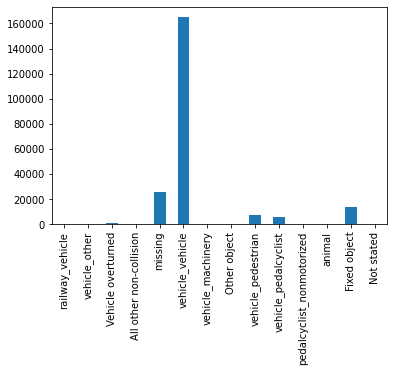

In [43]:
df['re_st_coldesc'].value_counts(sort=False).plot.bar()

It is note worthy that the vast majority of the accidents are vehicle to vehicle.

In [44]:
df['st_coldesc'].count()

194284

In [45]:
sum(df['st_coldesc'].isnull())

26152

**Check the relation between re_st_coldesc and st_coldesc**

In [46]:
pd.crosstab(df["st_coldesc"], df["re_st_coldesc"], margins=True)

re_st_coldesc,All other non-collision,Fixed object,Not stated,Other object,Vehicle overturned,animal,pedalcyclist_nonmotorized,railway_vehicle,vehicle_machinery,vehicle_other,vehicle_pedalcyclist,vehicle_pedestrian,vehicle_vehicle,All
st_coldesc,,,,,,,,,,,,,,
All Other Multi Vehicle,0,0,0,0,0,0,0,0,0,0,0,0,8,8
All other non-collision,109,0,0,0,0,0,0,0,0,0,0,0,0,109
Breakage of any part of the vehicle resulting in injury or in further property damage,0,0,0,0,0,0,0,0,0,34,0,0,0,34
"Domestic animal other (cat, dog, etc)",0,0,0,0,0,33,0,0,0,0,0,0,0,33
Entering at angle,0,0,0,0,0,0,0,0,0,0,0,0,35366,35366
Fire started in vehicle,0,0,0,0,0,0,0,0,0,7,0,0,0,7
Fixed object,0,14061,0,0,0,0,0,0,0,0,0,0,0,14061
From opposite direction - all others,0,0,0,0,0,0,0,0,0,0,0,0,1358,1358
From opposite direction - both going straight - one stopped - sideswipe,0,0,0,0,0,0,0,0,0,0,0,0,236,236


**Check the relation between re_st_coldesc and collisiontype**

In [47]:
pd.crosstab(df["collisiontype"], df["re_st_coldesc"], margins=True)

re_st_coldesc,All other non-collision,Fixed object,Not stated,Other object,Vehicle overturned,animal,pedalcyclist_nonmotorized,railway_vehicle,vehicle_machinery,vehicle_other,vehicle_pedalcyclist,vehicle_pedestrian,vehicle_vehicle,All
collisiontype,,,,,,,,,,,,,,
Angles,0,0,0,0,0,0,0,0,0,0,0,0,35366,35366
Cycles,0,0,0,0,0,0,51,0,0,0,5842,0,0,5893
Head On,0,0,0,0,0,0,0,0,0,0,0,0,2172,2172
Left Turn,0,0,0,0,0,0,0,0,0,0,0,0,14047,14047
Other,109,14061,47,381,915,37,0,178,82,74,0,0,8566,24450
Parked Car,0,0,0,0,0,0,0,0,0,0,0,0,48364,48364
Pedestrian,0,0,0,0,0,0,0,0,0,0,0,7637,0,7637
Rear Ended,0,0,0,0,0,0,0,0,0,0,0,0,34545,34545
Right Turn,0,0,0,0,0,0,0,0,0,0,0,0,2998,2998


- collisiontype's 'Pedestrian' corresponds to re_st_coldesc's 'vehicle_pedestrian'
- collisiontype's 'Cycles' corresponds to re_st_coldesc's 'vehicle_pedalcyclist'
- re_st_coldesc provides more nuanced labels for collisiontype's 'Other'
- to understand how accidents are happening and to suggest improvements, it may be worth trying looking into subcategories of re_st_coldesc' vehicle_vehicle

**Check the relation between re_st_coldesc and severitycode**

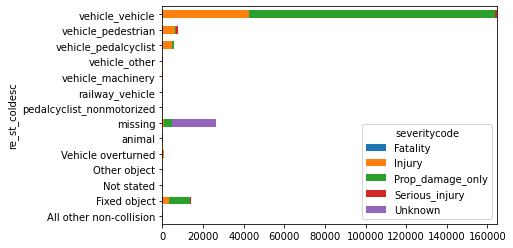

In [48]:
df.pivot_table(index="re_st_coldesc", columns="severitycode", aggfunc="size").plot.barh(
    stacked=True
)

**re_st_coldesc categories within severitycode categories**

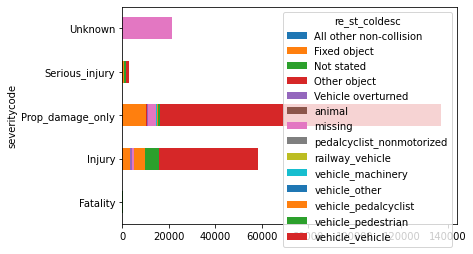

In [49]:
df.pivot_table(index="severitycode", columns="re_st_coldesc", aggfunc="size").plot.barh(
    stacked=True
)

## Cluster analysis

**One hot encode st_coldesc**

In [50]:
onehot = pd.get_dummies(df["st_coldesc"])
onehot.head()

,All Other Multi Vehicle,All other non-collision,Breakage of any part of the vehicle resulting in injury or in further property damage,"Domestic animal other (cat, dog, etc)",Entering at angle,Fire started in vehicle,Fixed object,From opposite direction - all others,From opposite direction - both going straight - one stopped - sideswipe,From opposite direction - both going straight - sideswipe,From opposite direction - both moving - head-on,From opposite direction - one left turn - one right turn,From opposite direction - one left turn - one straight,From opposite direction - one stopped - head-on,From same direction - all others,From same direction - both going straight - both moving - rear-end,From same direction - both going straight - both moving - sideswipe,From same direction - both going straight - one stopped - rear-end,From same direction - both going straight - one stopped - sideswipe,From same direction - one left turn - one straight,From same direction - one right turn - one straight,"Non-domestic animal (deer, bear, elk, etc)",Not stated,One car entering driveway access,One car entering parked position,One car leaving driveway access,One car leaving parked position,One parked--one moving,Other object,Pedalcyclist All Other Involvements ONE UNIT - PEDALCYCLIST ONLY or PEDALCYCLIST STR,Pedalcyclist Strikes Moving Vehicle,Pedalcyclist Strikes Pedalcyclist or Pedestrian,"Person fell, jumped or was pushed from vehicle",Railway Vehicle Strikes Pedalcyclist,Railway Vehicle Strikes Pedestrian,Railway Vehicle Strikes Vehicle,Same direction -- both turning left -- both moving -- rear end,Same direction -- both turning left -- both moving -- sideswipe,Same direction -- both turning left -- one stopped -- rear end,Same direction -- both turning left -- one stopped -- sideswipe,Same direction -- both turning right -- both moving -- rear end,Same direction -- both turning right -- both moving -- sideswipe,Same direction -- both turning right -- one stopped -- rear end,Same direction -- both turning right -- one stopped -- sideswipe,Strikes or Was Struck by Object from the Load of Another Vehicle,Strikes or Was Struck by a Part of Another Vehicle (Not from Load),Vehicle - Pedalcyclist,Vehicle Hits City Road or Construction Machinery,Vehicle Hits Other Road or Construction Machinery,Vehicle Hits State Road or Construction Machinery,Vehicle Strikes All Other Non-Domestic Animal,Vehicle Strikes Deer,Vehicle Strikes Pedalcyclist,Vehicle Strikes Railway Vehicle,Vehicle Struck by City Road or Construction Machinery,Vehicle Struck by Other Road or Construction Machinery,Vehicle backing hits pedestrian,Vehicle going straight hits pedestrian,Vehicle hits Pedestrian - All Other Actions,Vehicle overturned,Vehicle turning left hits pedestrian,Vehicle turning right hits pedestrian
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [51]:
onehot.shape

(220436, 62)

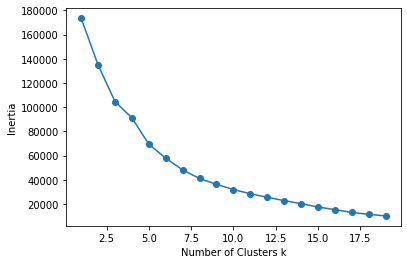

In [52]:
num_clusters = list(range(1, 20))
inertias = []

for k in num_clusters:
    model = KMeans(n_clusters=k)
    model.fit(onehot)
    inertias.append(model.inertia_)

plt.plot(num_clusters, inertias, "-o")

plt.xlabel("Number of Clusters k")
plt.ylabel("Inertia")

plt.show()

- The figure above suggests that 7 might be a good number of clusters
- But that wouldn't provide  additional labels to collisiontype, which is made up of 10 labels
- So let's try 10 for this analysis...

In [53]:
n_clusters = 10

kmeans = KMeans(n_clusters=n_clusters, random_state=0)
kmeans.fit(onehot)
df["cluster"] = kmeans.predict(onehot)

In [54]:
df["cluster"]

0         1
1         1
2         3
3         4
4         1
         ..
220431    2
220432    1
220433    0
220434    0
220435    1
Name: cluster, Length: 220436, dtype: int32

In [55]:
pd.crosstab(df["st_coldesc"], df["cluster"])

cluster,0,1,2,3,4,5,6,7,8,9
st_coldesc,,,,,,,,,,
All Other Multi Vehicle,0,8,0,0,0,0,0,0,0,0
All other non-collision,0,109,0,0,0,0,0,0,0,0
Breakage of any part of the vehicle resulting in injury or in further property damage,0,34,0,0,0,0,0,0,0,0
"Domestic animal other (cat, dog, etc)",0,33,0,0,0,0,0,0,0,0
Entering at angle,0,0,0,35366,0,0,0,0,0,0
Fire started in vehicle,0,7,0,0,0,0,0,0,0,0
Fixed object,0,0,0,0,0,14061,0,0,0,0
From opposite direction - all others,0,1358,0,0,0,0,0,0,0,0
From opposite direction - both going straight - one stopped - sideswipe,0,236,0,0,0,0,0,0,0,0


- st_coldesc labels that don't have high numbers of counts were all grouped into Cluster 1
- Not too useful...